In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import matplotlib.patches as mpatches

datafile = '../data/country_gdp_growth.csv'
shapefile = '../data/world_shape/ne_10m_admin_0_countries_lakes.shp'

colors = 9
cmap = 'RdYlGn'
figsize = (16, 10)
year = '2016'
cols = ['Country Name', 'Country Code', year]
title = 'Rast BDP držav EU v letu {}'.format(year)

In [2]:
eu = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU',
     'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR']
world = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']]
world = world[world['ADM0_A3'].isin(eu)]
world.head()

,ADM0_A3,geometry
7,CYP,(POLYGON ((33.78183027400007 34.97622304900005...
22,FRA,(POLYGON ((-54.1115266969999 2.114270443000066...
44,LTU,(POLYGON ((26.59453129100007 55.66699086600006...
49,CZE,"POLYGON ((14.81039270000014 50.85844716400005,..."
50,DEU,(POLYGON ((13.81572473100007 48.76643015600006...


In [3]:
df = pd.read_csv(datafile, skiprows=4, usecols=cols)
df = df[df['Country Code'].isin(eu)]
if df[year].min() > 0:
    cmap = 'Greens'
if df[year].mean() < 0:
    cmap = 'Reds_r'
df.head()

,Country Name,Country Code,2016
12,Austria,AUT,1.450915
15,Belgium,BEL,1.412292
19,Bulgaria,BGR,3.936758
51,Cyprus,CYP,4.812188
52,Czech Republic,CZE,2.593326


In [4]:
merged = world.merge(df, left_on='ADM0_A3', right_on='Country Code')
merged.describe()

,2016
count,28.000000
mean,2.660077
std,1.318259
min,-0.244315
25%,1.941667
50%,2.279034
75%,3.287021
max,5.230585


D:\Users\HP\Miniconda3\lib\site-packages\geopandas\plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


<Figure size 432x288 with 0 Axes>

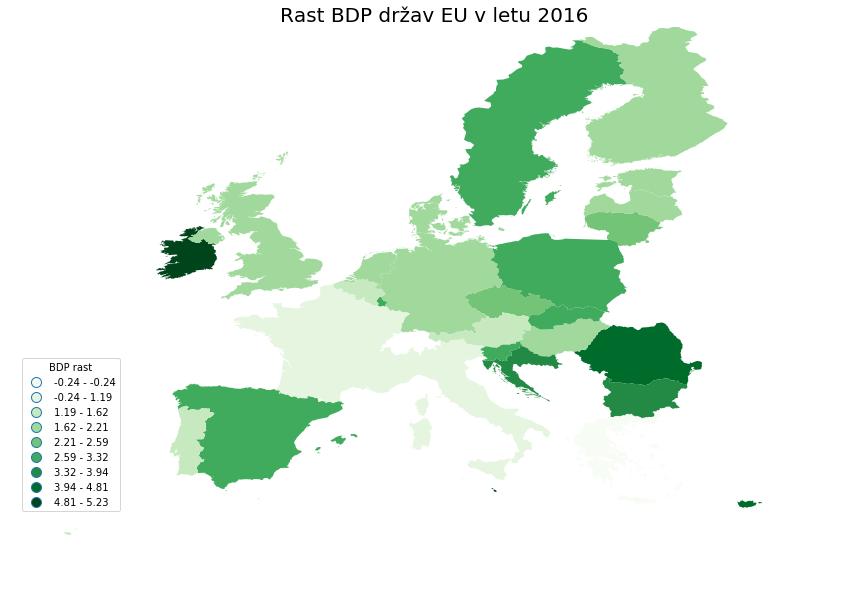

In [5]:
cmap = 'Greens'
fig = plt.figure()
ax = merged.dropna().plot(column=year, cmap=cmap, figsize=figsize, scheme='fisher_jenks', k=colors, legend=True)
#ax.margins(-2, -2)
ax.set_xlim(-20, 40)
ax.set_ylim(30, 70)

merged[merged.isna().any(axis=1)].plot(ax=ax, facecolor='#A9A9A9')

ax.set_axis_off()
ax.set_title(title, fontdict={'fontsize': 20})
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.get_legend().set_title('BDP rast')